## Hello and welcome to this notebook 'Sprints_Airbnb':)


## In this notebook we have 3 Tasks 'Please click on the task you want'
###  1- [Visualization](#visuals)
###  2-[Time Series Analysis 'fbprophet'](#fb)
###    [Time Series Analysis'ARIMA'](#arima)
###  3-[Machine Learning 1 'KNN'](#knn)
###    [Machine Learning 2 'Random Forest '](#random)



### The data file we are going to work with is :[train_users_2.xlsx]

# Manipulting and Cleaning our data :

In [1]:
# Here we import the libraries we gonna use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
#here we import our data from this excel file : train_users2.csv
df = pd.read_csv('train_users_2.csv')
df.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [4]:
#Here we drop the columns that we won't use in the analysis
df.drop(columns = {'id','first_device_type','timestamp_first_active'},inplace = True)



In [5]:
df['first_affiliate_tracked'].fillna('untracked',inplace = True)

In [6]:
df.date_account_created = df.date_account_created.astype('datetime64[ns]')

In [7]:
#We calculate here the age for each person that entered his birthday instead of his age.
for i in range(len(df['age'])):
    if len(str(df.age[i]))>5: #here we convert the age from integer dtype to string to calculate the length of it.
      df['age'][i] = df['date_account_created'][i].year - df['age'][i]
    


<ipython-input-7-24136042feed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'][i] = df['date_account_created'][i].year - df['age'][i]


In [8]:
df.age.isnull().sum()

87990

In [9]:
df.head(5)

,date_account_created,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_browser,country_destination
0,2010-06-28,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Chrome,NDF
1,2011-05-25,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Chrome,NDF
2,2010-09-28,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,IE,US
3,2011-12-05,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Firefox,other
4,2010-09-14,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Chrome,US


In [10]:
#We replace here the negative values for the age with zeros
for i in df.age:
    if i <0:
        i = 0
        

In [11]:
df.dropna(subset = ['age'],inplace = True)
df

,date_account_created,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_browser,country_destination
1,2011-05-25,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Chrome,NDF
2,2010-09-28,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,IE,US
3,2011-12-05,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Firefox,other
4,2010-09-14,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Chrome,US
6,2010-01-02,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Safari,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213441,2014-06-30,2014-08-13,FEMALE,34.0,basic,0,en,direct,direct,linked,Web,Chrome,ES
213443,2014-06-30,2014-07-13,FEMALE,36.0,basic,0,en,sem-brand,google,linked,Web,Safari,US
213445,2014-06-30,2014-07-02,FEMALE,23.0,basic,0,en,sem-brand,google,omg,Web,IE,US
213446,2014-06-30,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Safari,NDF


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125461 entries, 1 to 213448
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date_account_created     125461 non-null  datetime64[ns]
 1   date_first_booking       68532 non-null   object        
 2   gender                   125461 non-null  object        
 3   age                      125461 non-null  float64       
 4   signup_method            125461 non-null  object        
 5   signup_flow              125461 non-null  int64         
 6   language                 125461 non-null  object        
 7   affiliate_channel        125461 non-null  object        
 8   affiliate_provider       125461 non-null  object        
 9   first_affiliate_tracked  125461 non-null  object        
 10  signup_app               125461 non-null  object        
 11  first_browser            125461 non-null  object        
 12  country_destinat

# 1-Data Visualization :

<a id='visuals'></a>

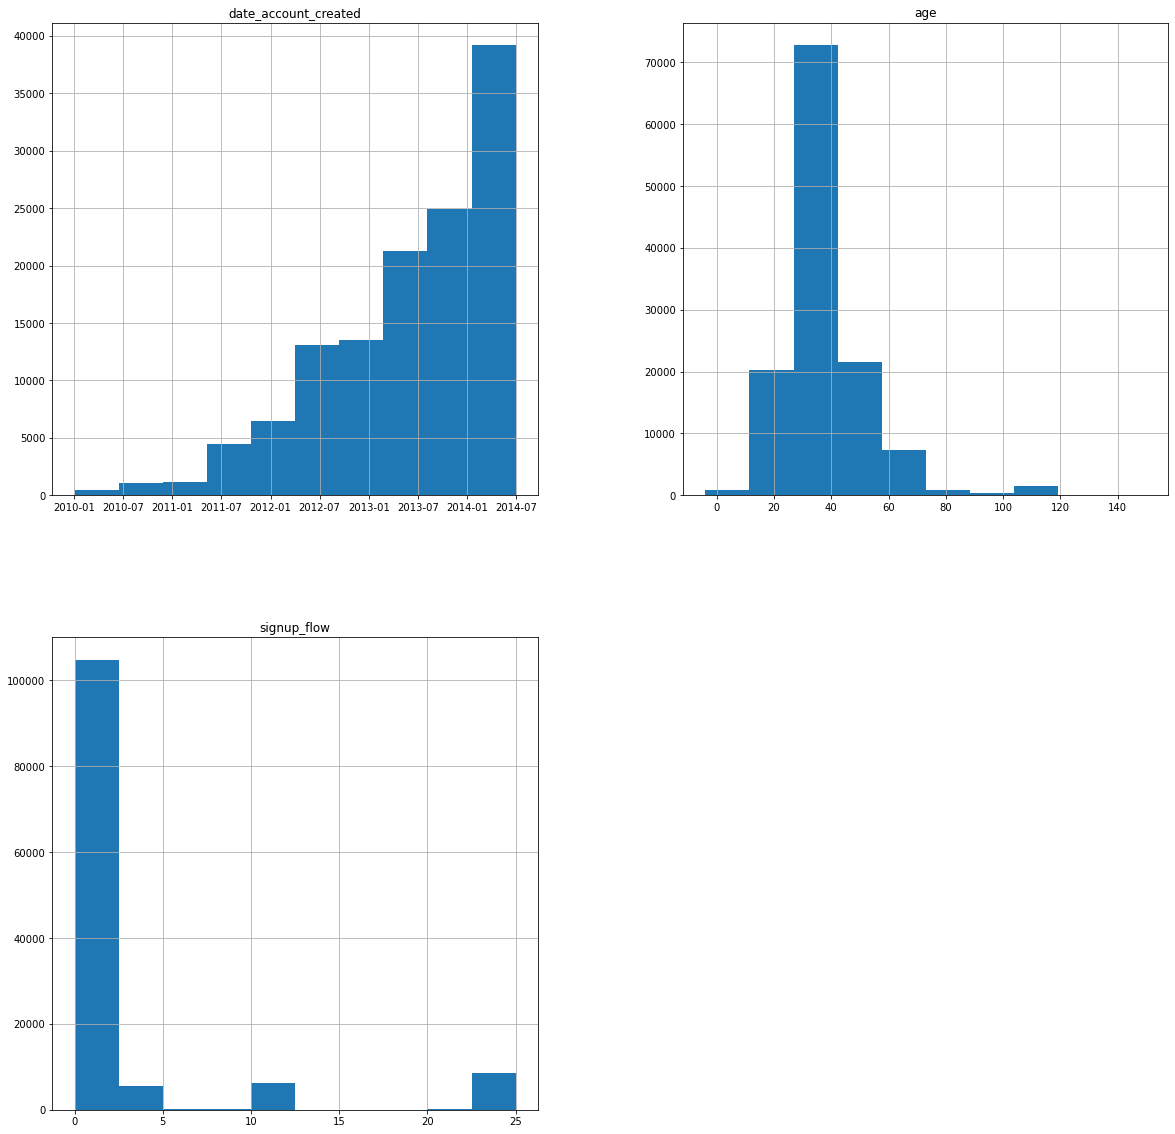

In [13]:
df.hist(figsize = (20,20));

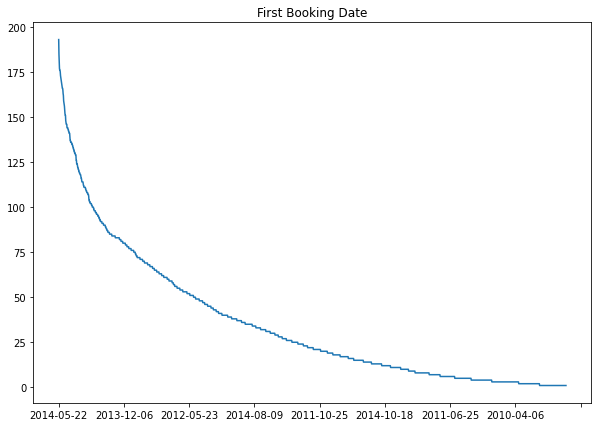

In [14]:
#Grouping by the date of First_booking ::)
df['date_first_booking'].value_counts().plot(figsize = (10,7))
plt.title('First Booking Date')
plt.show()

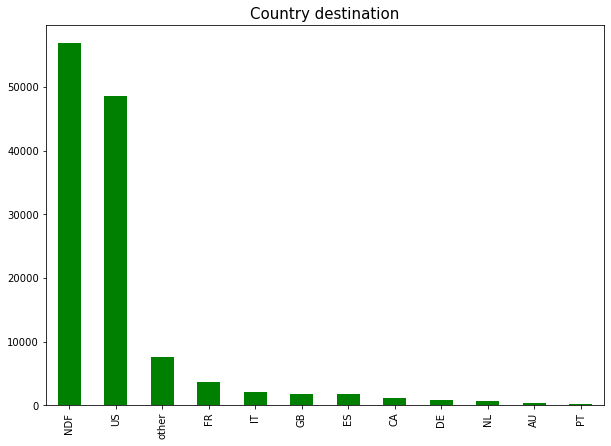

In [80]:
df['country_destination'].value_counts().plot(kind = 'bar',color = 'green',figsize = (10,7))
plt.title('Country destination',size = 15)
plt.show()


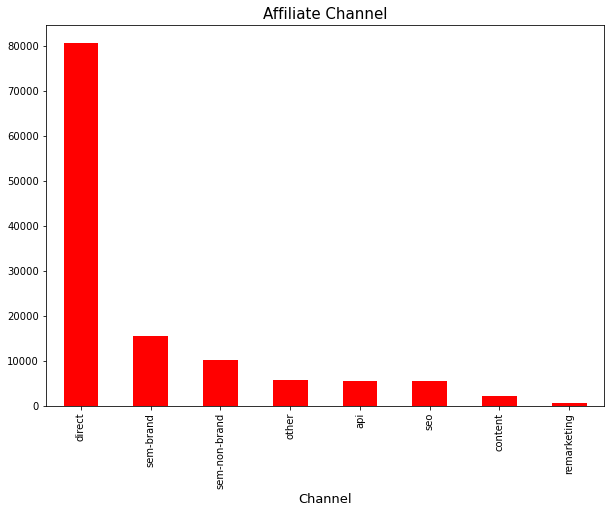

In [16]:
#Affiliate marketing is a process where publishers earn a commission by promoting a product or service made by another retailer
#or advertiser.The  affiliate partner is rewarded a payout for providing a specific result to the retailer or advertiser.
df['affiliate_channel'].value_counts().plot(kind = 'bar',color = 'red',figsize = (10,7))
plt.xlabel('Channel',size = 13)
plt.title('Affiliate Channel',size = 15)
plt.show()

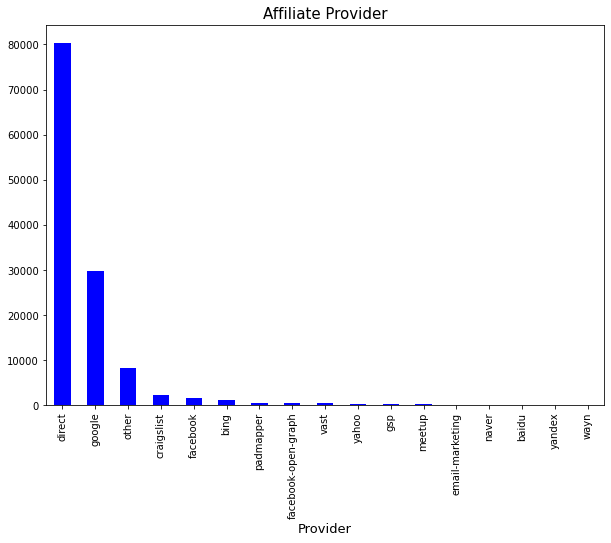

In [17]:
# Affiliate provider :
df['affiliate_provider'].value_counts().plot(kind = 'bar',color = 'blue',figsize = (10,7))
plt.xlabel('Provider',size = 13)
plt.title('Affiliate Provider',size = 15)
plt.show()

## As previous 'direct' is the most successful channel among all the affiliate channels. 

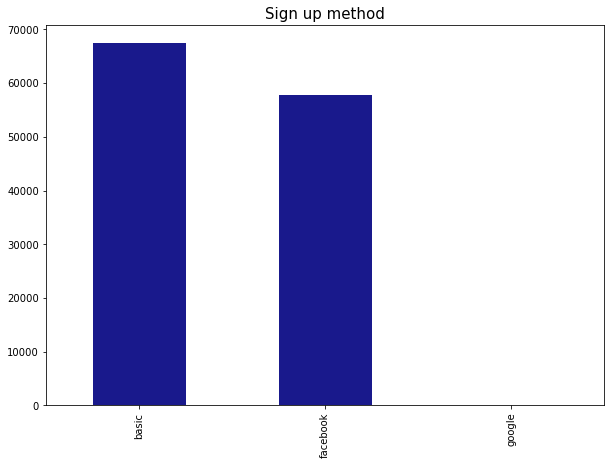

In [18]:
df['signup_method'].value_counts().plot(kind = 'bar',alpha = 0.9,color = 'navy',figsize = (10,7))
plt.title('Sign up method',size = 15)
plt.show()

## Here we notice that 'basic' is the most frequant sign up platform between the users.

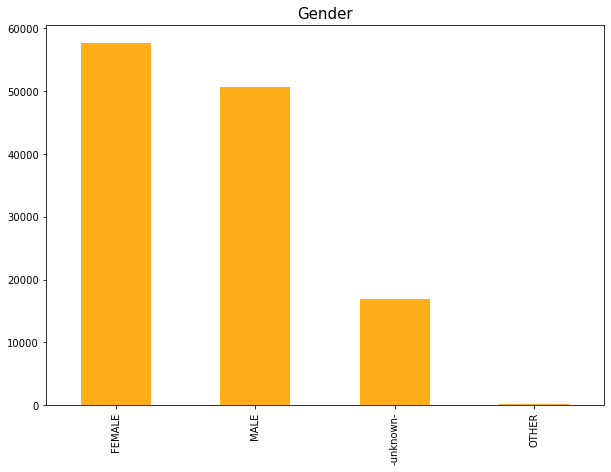

In [19]:
df['gender'].value_counts().plot(kind = 'bar',alpha = 0.9,color = 'orange',figsize = (10,7))
plt.title('Gender',size = 15)
plt.show()

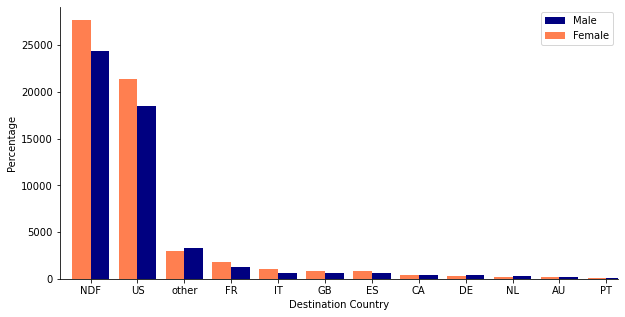

In [20]:
#calculate the number of males and females
women = sum(df['gender'] == 'FEMALE')
men = sum(df['gender'] == 'MALE')

#now we use df.loc to know the destination for each person and then .value_counts() to know the number of people for each destination :
female_destinations = df.loc[df['gender'] == 'FEMALE', 'country_destination'].value_counts() 
male_destinations = df.loc[df['gender'] == 'MALE', 'country_destination'].value_counts() 

# Bar width
width = 0.4

male_destinations.plot(kind='bar', width=width, color='navy', position=0, label='Male', rot=0,figsize = (10,5))
female_destinations.plot(kind='bar', width=width, color='coral', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

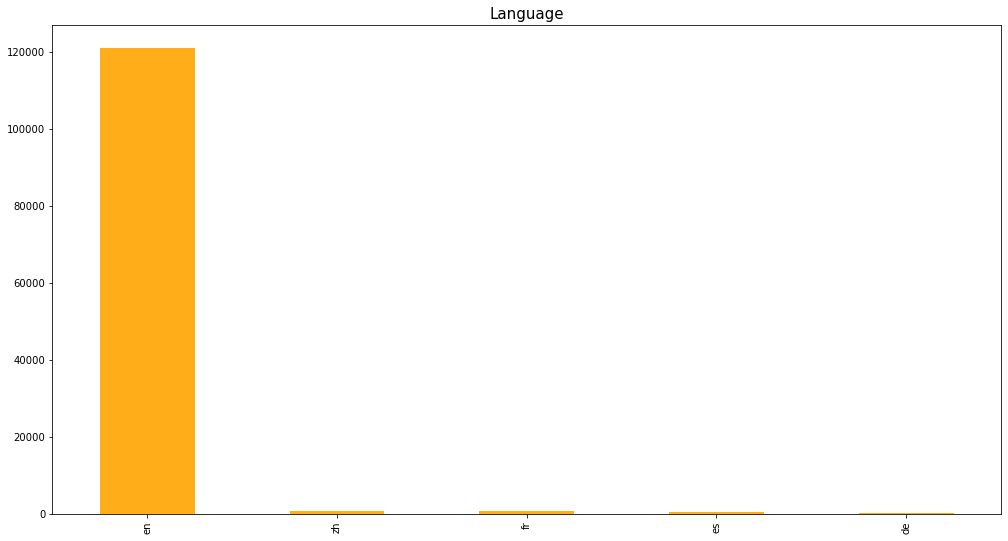

In [21]:
df['language'].value_counts()[:5].plot(kind = 'bar',alpha = 0.9,color = 'orange',figsize = (17,9))
plt.title('Language',size = 15)
plt.show()

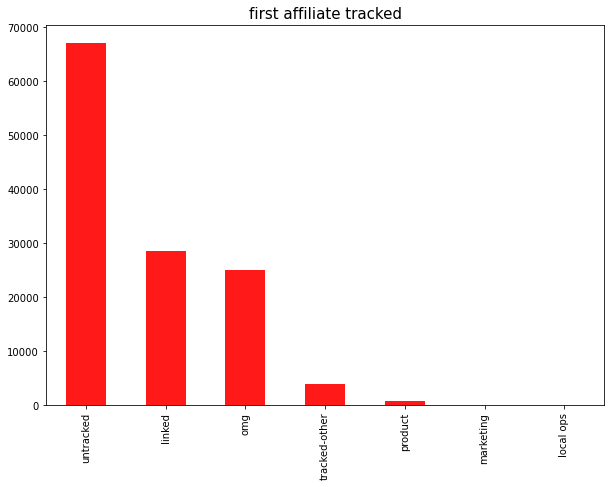

In [22]:
df['first_affiliate_tracked'].value_counts().plot(kind = 'bar',alpha = 0.9,color = 'red',figsize = (10,7))
plt.title('first affiliate tracked',size = 15)
plt.show()

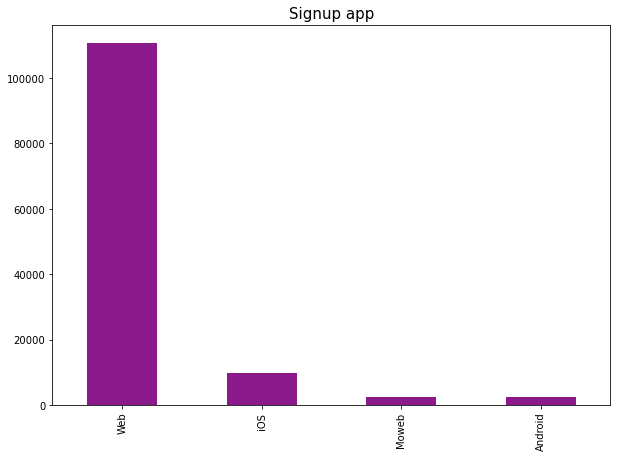

In [23]:
df['signup_app'].value_counts().plot(kind = 'bar',alpha = 0.9,color = 'purple',figsize = (10,7))
plt.title('Signup app',size = 15)
plt.show()

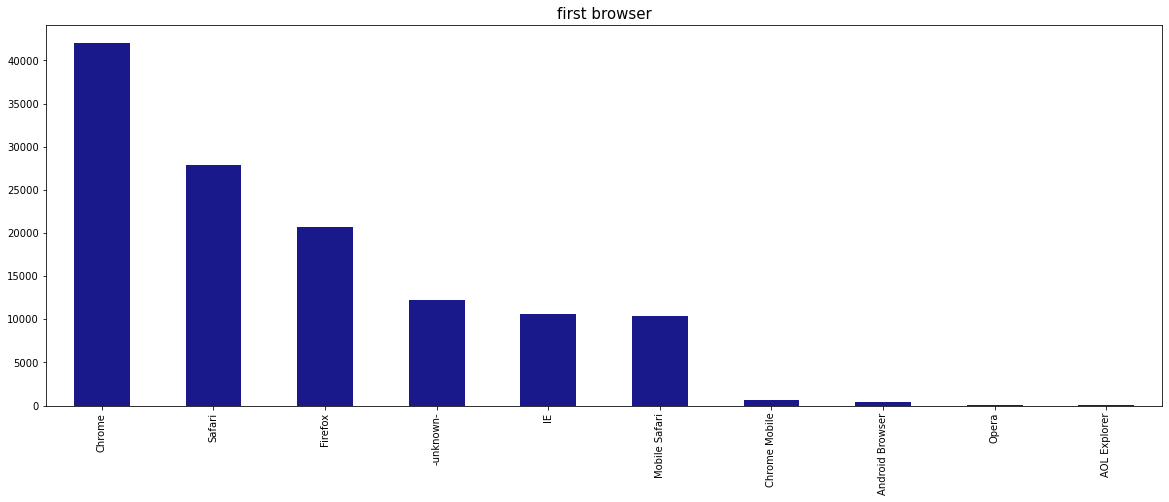

In [24]:
df['first_browser'].value_counts()[:10].plot(kind = 'bar',alpha = 0.9,color = 'navy',figsize = (20,7))
plt.title('first browser',size = 15)
plt.show()

## Bivariate plots :

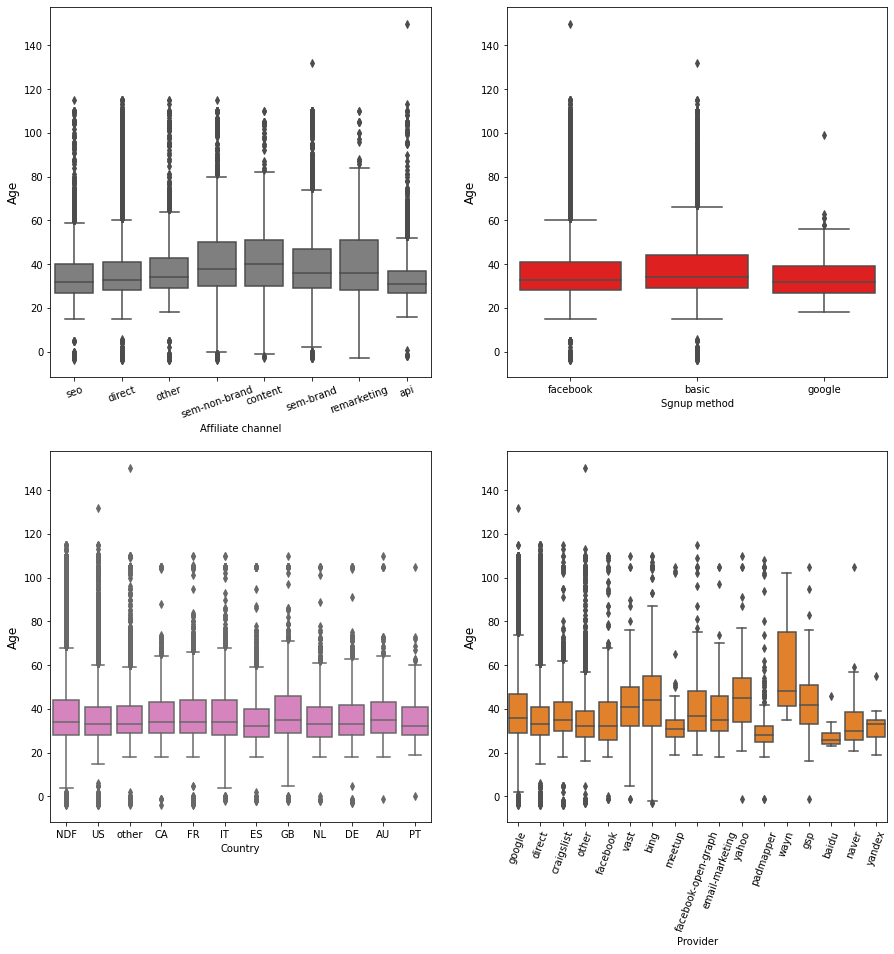

In [25]:
#Here : we provide a comparison between muliple parameters with age for each in scatter plots
plt.figure(figsize = (15,15))

plt.subplot(2,2,1)
sns.boxplot(x = df['affiliate_channel'], y =df['age'],color=sns.color_palette()[7] );
plt.xlabel('Affiliate channel')
plt.ylabel('Age',size = 12)
plt.xticks(rotation = 20)

plt.subplot(2,2,2)
sns.boxplot(x =df['signup_method'] , y =df['age'] ,color = 'red');
plt.xlabel('Sgnup method')
plt.ylabel('Age',size = 12)


plt.subplot(2,2,3)
sns.boxplot(x = df['country_destination'], y =df['age'] ,color=sns.color_palette()[6]);
plt.xlabel('Country')
plt.ylabel('Age',size = 12)

plt.subplot(2,2,4)
sns.boxplot(x = df['affiliate_provider'], y =df['age'] ,color=sns.color_palette()[1]);
plt.xlabel('Provider')
plt.ylabel('Age',size = 12)
plt.xticks(rotation = 70)


plt.show();

<a id='fb'></a>

# 2.Time Series Analysis :

In [26]:
df.head()

,date_account_created,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_browser,country_destination
1,2011-05-25,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Chrome,NDF
2,2010-09-28,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,IE,US
3,2011-12-05,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Firefox,other
4,2010-09-14,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Chrome,US
6,2010-01-02,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Safari,US


## Predicting the number of clients  using the time series Anlaysis :

In [27]:
freq = df['date_account_created'].value_counts()
ts = pd.DataFrame(data = freq)
ts.reset_index(inplace = True)
ts.columns = ['ds','y']
ts.head()

,ds,y
0,2014-06-24,368
1,2014-06-25,359
2,2014-05-13,354
3,2014-05-20,344
4,2014-06-03,343


In [28]:
ts.sort_values('ds')
#we notice here that the last date is << '30-06-2014' >>

,ds,y
1617,2010-01-02,1
1600,2010-01-03,1
1498,2010-01-04,3
1533,2010-01-05,2
1499,2010-01-07,3
...,...,...
23,2014-06-26,299
14,2014-06-27,324
58,2014-06-28,256
50,2014-06-29,263


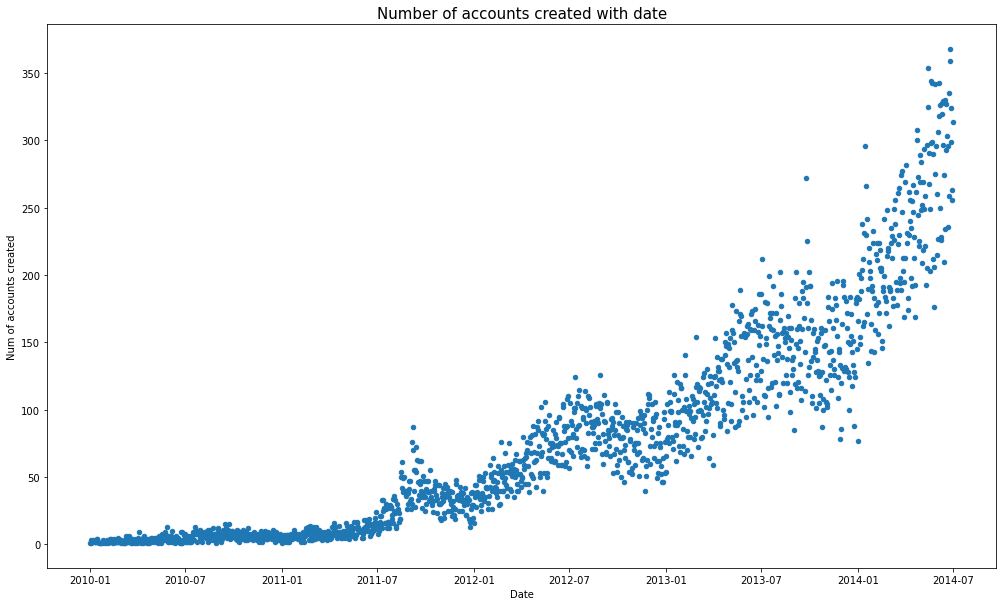

In [29]:
#Here, plotting our data over time 
ts.plot(kind = 'scatter',x = 'ds',y = 'y',figsize = (17,10))
plt.title('Number of accounts created with date' , size = 15)
plt.xlabel('Date')
plt.ylabel('Num of accounts created')
plt.show();

In [30]:
#Training our model:-
m = Prophet(interval_width=0.95, daily_seasonality=False)
model = m.fit(ts)

# Forecasting :

In [31]:
future = m.make_future_dataframe(periods=100,freq='D') # here we want to predict 100 'D' for 'days' 
forecast = m.predict(future) #we then pass our future data to get the forecast
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-02,3.415354,-58.485254,7.763024,3.415354,3.415354,-30.335736,-30.335736,-30.335736,-15.497563,-15.497563,-15.497563,-14.838173,-14.838173,-14.838173,0.0,0.0,0.0,-26.920382
1,2010-01-03,3.399733,-61.198164,8.196808,3.399733,3.399733,-29.403434,-29.403434,-29.403434,-15.862419,-15.862419,-15.862419,-13.541014,-13.541014,-13.541014,0.0,0.0,0.0,-26.003701
2,2010-01-04,3.384111,-42.070926,33.578324,3.384111,3.384111,-6.527554,-6.527554,-6.527554,5.688411,5.688411,5.688411,-12.215964,-12.215964,-12.215964,0.0,0.0,0.0,-3.143442
3,2010-01-05,3.368490,-31.770924,39.820716,3.368490,3.368490,1.476108,1.476108,1.476108,12.358832,12.358832,12.358832,-10.882724,-10.882724,-10.882724,0.0,0.0,0.0,4.844598
4,2010-01-07,3.337247,-35.789127,35.579115,3.337247,3.337247,-3.027960,-3.027960,-3.027960,5.243066,5.243066,5.243066,-8.271026,-8.271026,-8.271026,0.0,0.0,0.0,0.309286


In [32]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1718,2014-10-04,308.409168,256.284795,329.594371,303.902232,313.405388,-15.004900,-15.004900,-15.004900,-15.497563,-15.497563,-15.497563,0.492663,0.492663,0.492663,0.0,0.0,0.0,293.404267
1719,2014-10-05,308.832265,257.051770,329.893808,304.255853,313.941791,-16.554959,-16.554959,-16.554959,-15.862419,-15.862419,-15.862419,-0.692540,-0.692540,-0.692540,0.0,0.0,0.0,292.277306
1720,2014-10-06,309.255363,279.328045,347.107687,304.609474,314.397739,3.815481,3.815481,3.815481,5.688411,5.688411,5.688411,-1.872930,-1.872930,-1.872930,0.0,0.0,0.0,313.070843
1721,2014-10-07,309.678460,285.817237,355.036007,304.958191,314.872519,9.323766,9.323766,9.323766,12.358832,12.358832,12.358832,-3.035066,-3.035066,-3.035066,0.0,0.0,0.0,319.002226
1722,2014-10-08,310.101558,279.346268,349.750214,305.287363,315.361179,5.636676,5.636676,5.636676,9.802789,9.802789,9.802789,-4.166112,-4.166112,-4.166112,0.0,0.0,0.0,315.738234


In [33]:
df2 = forecast[['ds','yhat']]
df2

,ds,yhat
0,2010-01-02,-26.920382
1,2010-01-03,-26.003701
2,2010-01-04,-3.143442
3,2010-01-05,4.844598
4,2010-01-07,0.309286
...,...,...
1718,2014-10-04,293.404267
1719,2014-10-05,292.277306
1720,2014-10-06,313.070843
1721,2014-10-07,319.002226


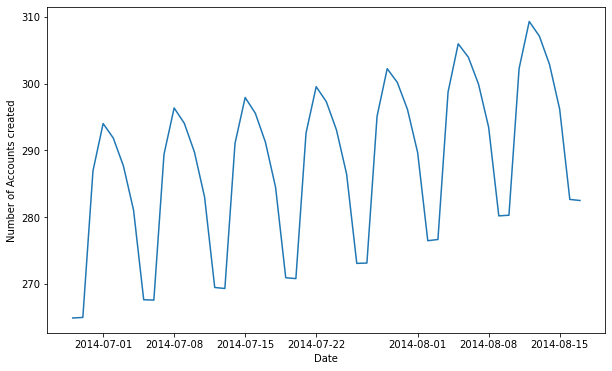

In [34]:
# Part of the predicted number of people with dates :
plt.figure(figsize = (10,6))
df2 = forecast[['ds','yhat']].loc[1620:1670]
sns.lineplot(x = df2.ds, y = df2.yhat); #A sample of the predicted number of customers
plt.xlabel('Date')
plt.ylabel('Number of Accounts created');

In [35]:
forecast[['ds','yhat']]

,ds,yhat
0,2010-01-02,-26.920382
1,2010-01-03,-26.003701
2,2010-01-04,-3.143442
3,2010-01-05,4.844598
4,2010-01-07,0.309286
...,...,...
1718,2014-10-04,293.404267
1719,2014-10-05,292.277306
1720,2014-10-06,313.070843
1721,2014-10-07,319.002226


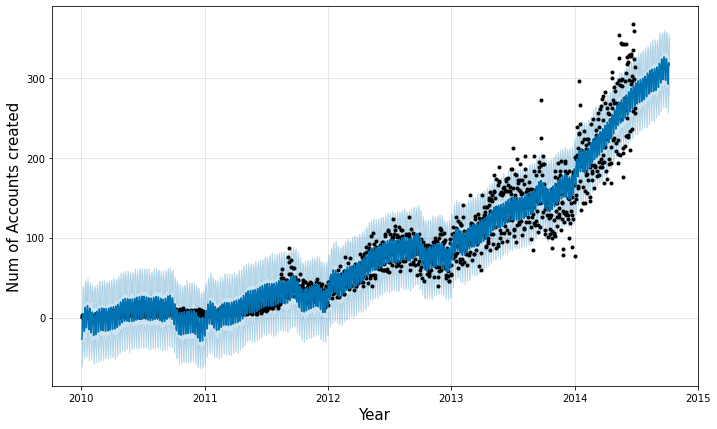

In [36]:
plot1 = m.plot(forecast)
plt.xlabel('Year',size = 15)
plt.ylabel('Num of Accounts created', size = 15);

## Decompositions :-

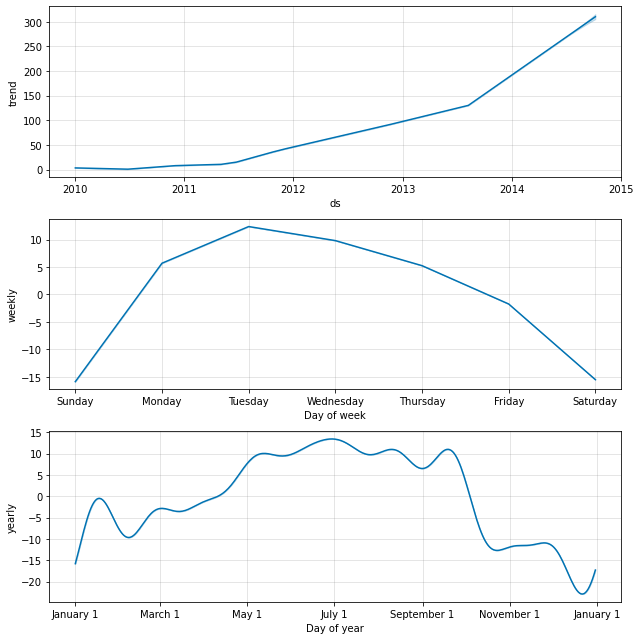

In [37]:
plt2 = m.plot_components(forecast)

<a id='arima'></a>

## Here is another solution using ARIMA Model:

In [38]:
df0 = pd.read_csv('train_users_2.csv',usecols=["date_account_created"],parse_dates=['date_account_created'])
df0 = df0.dropna()
print('Shape of data', df0.shape)
df0.head()

Shape of data (213451, 1)


,date_account_created
0,2010-06-28
1,2011-05-25
2,2010-09-28
3,2011-12-05
4,2010-09-14


In [39]:
df0['freq'] = df0.groupby('date_account_created')['date_account_created'].transform('count')

df0 = df0.drop_duplicates(subset=['date_account_created'], keep='first')

from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)



In [40]:
adf_test(df0['freq'])

1. ADF :  1.8563998343016113
2. P-Value :  0.9984545548370587
3. Num Of Lags :  21
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1612
5. Critical Values :
	 1% :  -3.4344131164513874
	 5% :  -2.8633346290071326
	 10% :  -2.5677254234217317


In [41]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [42]:
stepwise_fit = auto_arima(df0['freq'],trace= True, suppress_warnings=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18059.909, Time=2.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18941.268, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18645.691, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18091.218, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18939.300, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18073.343, Time=0.98 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18069.827, Time=1.28 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=18072.393, Time=2.47 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=18051.344, Time=3.74 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=18063.371, Time=1.36 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=18080.182, Time=3.83 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=18051.155, Time=3.20 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=18073.727, Time=1.63 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=18066.782, Time=4.17 sec
 ARIMA(2,1,5)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1634
Model:               SARIMAX(2, 1, 4)   Log Likelihood               -9017.577
Date:                Sat, 10 Sep 2022   AIC                          18051.155
Time:                        17:14:38   BIC                          18094.340
Sample:                             0   HQIC                         18067.175
                               - 1634                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2088      0.119      1.753      0.080      -0.025       0.442
ar.L1          1.0993      0.107     10.262      0.000       0.889       1.309
ar.L2         -0.7456      0.090     -8.251      0.000      -0.923      -0.568
ma.L1         -1.9406      0.108    -18.008      0.000      -2.152      -1.729
ma.L2          1.5366      0.170      9.036      0.000       1.203       1.870
ma.L3         -0.5238      0.084     -6.215      0.000      -0.689      -0.359
ma.L4         -0.0278      0.034     -0.808      0.419      -0.095       0.040
sigma2      3657.6203     65.554     55.795      0.000    3529.136    3786.105
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             36941.01
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.45   Skew:                             3.90
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
from statsmodels.tsa.arima_model import ARIMA

print(df0.shape)
train0=df0.iloc[:-30]
test0=df0.iloc[-30:]
start=len(train0)
end=len(train0)+len(test0)-1
test0.index=df0['date_account_created'][start:end+1]
print(train0.shape,test0.shape)
print(test0.iloc[0],test0.iloc[-1])

import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train0['freq'], order=(2,1,4))
result = model.fit()
result.summary()

(1634, 2)
(1604, 2) (30, 2)
date_account_created    2014-05-25 00:00:00
freq                                    330
Name: 2014-05-25 00:00:00, dtype: object date_account_created    2014-06-30 00:00:00
freq                                    590
Name: 2014-06-30 00:00:00, dtype: object


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   freq   No. Observations:                 1604
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -8847.261
Date:                Sat, 10 Sep 2022   AIC                          17708.522
Time:                        17:15:12   BIC                          17746.180
Sample:                             0   HQIC                         17722.505
                               - 1604                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0915      0.113      9.672      0.000       0.870       1.313
ar.L2         -0.7447      0.097     -7.661      0.000      -0.935      -0.554
ma.L1         -1.9373      0.113    -17.154      0.000      -2.159      -1.716
ma.L2          1.5544      0.178      8.718      0.000       1.205       1.904
ma.L3         -0.5542      0.089     -6.226      0.000      -0.729      -0.380
ma.L4         -0.0154      0.034     -0.451      0.652      -0.082       0.052
sigma2      3638.0791     38.467     94.577      0.000    3562.685    3713.473
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             39642.94
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               1.43   Skew:                             4.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
start=len(train0)
end=len(train0)+len(test0)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
# index_future_dates=pd.date_range(start=df['date_account_created'][start],end=df['date_account_created'][end])
pred=result.predict(start=start,end=end,type='levels').rename('ARIMA predictions')
pred.index=df['date_account_created'][start:end+1]
# pred.index=index_future_dates

print(pred)

date_account_created
2010-12-11    447.116345
2010-12-11    451.411479
2010-12-11    465.230150
2010-12-11    478.261918
2010-12-11    482.195721
2010-12-12    476.785083
2010-12-12    467.949985
2010-12-12    462.335626
2010-12-12    462.786799
2010-12-12    467.460105
2010-12-12    472.225040
2010-12-12    473.945889
2010-12-12    472.275884
2010-12-13    469.171609
2010-12-13    467.026898
2010-12-13    466.997612
2010-12-13    468.562750
2010-12-14    470.292906
2010-12-14    471.015858
2010-12-14    470.516561
2010-12-14    469.433218
2010-12-14    468.622562
2010-12-14    468.544465
2010-12-15    469.062895
2010-12-15    469.686917
2010-12-15    469.981977
2010-12-15    469.839344
2010-12-15    469.463937
2010-12-15    469.160396
2010-12-15    469.108635
Name: ARIMA predictions, dtype: float64


# 3-Machine learning model :

<a id='knn'></a>

We split the Dataset into train and test subsets:

In [47]:
ml = df.drop(['date_account_created','date_first_booking','language','signup_flow'],axis = 1)
ml.fillna(-1)
ml.head(5)

,gender,age,signup_method,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_browser,country_destination
1,MALE,38.0,facebook,seo,google,untracked,Web,Chrome,NDF
2,FEMALE,56.0,basic,direct,direct,untracked,Web,IE,US
3,FEMALE,42.0,facebook,direct,direct,untracked,Web,Firefox,other
4,-unknown-,41.0,basic,direct,direct,untracked,Web,Chrome,US
6,FEMALE,46.0,basic,other,craigslist,untracked,Web,Safari,US


In [48]:
#>>>>>>>>>>
#Encoding data columns using sklearn :
# from sklearn import preprocessing
# ge = preprocessing.LabelEncoder()
# gender_encoded = ge.fit_transform(ml['gender'])

# sme = preprocessing.LabelEncoder()
# signup_meth_encoded = sme.fit_transform(ml['signup_method'])

# ace = preprocessing.LabelEncoder()
# af_ch_encoded = ace.fit_transform(ml['affiliate_channel'])

# ape = preprocessing.LabelEncoder()
# af_pro_encoded = ape.fit_transform(ml['affiliate_provider'])

# fae = preprocessing.LabelEncoder()
# fir_aff_track_encoded = fae.fit_transform(ml['first_affiliate_tracked'])

# sae = preprocessing.LabelEncoder()
# signup_app_encoded = sae.fit_transform(ml['signup_app'])

# fbe = preprocessing.LabelEncoder()
# fir_brow_encoded = fbe.fit_transform(ml['first_browser'])


In [49]:
#>>>>>>>>>>>>>>
# x = list(zip(gender_encoded,ml.age,signup_meth_encoded,af_ch_encoded,af_pro_encoded,fir_aff_track_encoded
#             ,signup_app_encoded, fir_brow_encoded))
# x

In [50]:
#Encoding data manulally :-
x = ml.drop(['country_destination'],axis =1)
x['gender'] = x['gender'].replace(x['gender'].unique(),np.arange(0,len(x['gender'].unique())))
x['signup_method'] = x['signup_method'].replace(x['signup_method'].unique(),np.arange(0,len(x['signup_method'].unique())))
x['affiliate_channel'] = x['affiliate_channel'].replace(x['affiliate_channel'].unique(),np.arange(0,len(x['affiliate_channel'].unique())))
x['affiliate_provider'] = x['affiliate_provider'].replace(x['affiliate_provider'].unique(),np.arange(0,len(x['affiliate_provider'].unique())))
x['first_affiliate_tracked'] = x['first_affiliate_tracked'].replace(x['first_affiliate_tracked'].unique(),np.arange(0,len(x['first_affiliate_tracked'].unique())))
x['signup_app'] = x['signup_app'].replace(x['signup_app'].unique(),np.arange(0,len(x['signup_app'].unique())))
x['first_browser'] = x['first_browser'].replace(x['first_browser'].unique(),np.arange(0,len(x['first_browser'].unique())))

x.head()

,gender,age,signup_method,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_browser
1,0,38.0,0,0,0,0,0,0
2,1,56.0,1,1,1,0,0,1
3,1,42.0,0,1,1,0,0,2
4,2,41.0,1,1,1,0,0,0
6,1,46.0,1,2,2,0,0,3


In [51]:
y = df['country_destination']
myy = y.unique()
print(myy)
y =y.replace(y.unique(),np.arange(0,len(y.unique())))
y

['NDF' 'US' 'other' 'CA' 'FR' 'IT' 'ES' 'GB' 'NL' 'DE' 'AU' 'PT']


1         0
2         1
3         2
4         1
6         1
         ..
213441    6
213443    1
213445    1
213446    0
213448    0
Name: country_destination, Length: 125461, dtype: int64

In [52]:
# ## >>>>>>>>
# #Encoding the target columns 'country_destination' :
# cde = preprocessing.LabelEncoder()
# countrydist_encoded = cde.fit_transform(df['country_destination'])
# y = countrydist_encoded
# np.unique(y)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
# now splitting our data into test and train treain_test_split :
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size = 0.2) 
#we here use 'random _state = 10' so that the result of splitting isnot changed each time we run the cell :)

Now we start building our KNN 'k nearest nighbour' classifier :-

In [55]:
import math
math.sqrt(len(y_test))

158.40770183296013

In [56]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors = 53,p = 12,metric = 'euclidean',weights = 'uniform')
kn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=53, p=12)

In [57]:
kn.score(x_test,y_test)

0.518431435061571

In [58]:
y_pred = kn.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [59]:
np.unique(y_pred)

array([0, 1], dtype=int64)

In [60]:

y_pred = pd.DataFrame(data = y_pred,index = np.arange(len(y_pred)))

y_pred =y_pred.replace(np.arange(0,len(myy)),myy)
y_pred.value_counts()


NDF    15460
US      9633
dtype: int64

# ----------------------------------------------------------------------------------------

• Here we notice that our model only predicts 'NDF' and 'US' destinations as the data is strongly favoured them, so the predicted results using all the data only contained 'NDF' and 'US'

◘ So we need to modify our data to predict other destinations as well so we will:
 *   1-Remove 'NDF' data points.
 *   2-Remove 20% of 'US'data points.

In [61]:
mod = df.drop(['date_account_created','date_first_booking','language','signup_flow'],axis = 1)
mod.fillna(-1)
mod.shape

(125461, 9)

In [62]:
# removing NDF data points :
mod = mod[mod.country_destination != 'NDF']
mod.head()

,gender,age,signup_method,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_browser,country_destination
2,FEMALE,56.0,basic,direct,direct,untracked,Web,IE,US
3,FEMALE,42.0,facebook,direct,direct,untracked,Web,Firefox,other
4,-unknown-,41.0,basic,direct,direct,untracked,Web,Chrome,US
6,FEMALE,46.0,basic,other,craigslist,untracked,Web,Safari,US
7,FEMALE,47.0,basic,direct,direct,omg,Web,Safari,US


In [63]:
#Here we remove 20% of the "US" data points
s = 0# first we calculate the number of us points
for i in mod['country_destination']:
    if (i== 'US'):
        s += 1
        
s = s*0.2
c = 0
#then we remove 20% off 
for i in mod['country_destination']: 
    if (i == 'US')& (c <s):
        mod = mod.drop(mod.index[c])
        c += 1


In [64]:
mod.head()

,gender,age,signup_method,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_browser,country_destination
3,FEMALE,42.0,facebook,direct,direct,untracked,Web,Firefox,other
6,FEMALE,46.0,basic,other,craigslist,untracked,Web,Safari,US
8,FEMALE,50.0,basic,other,craigslist,untracked,Web,Safari,US
10,FEMALE,36.0,basic,other,craigslist,untracked,Web,Firefox,US
17,-unknown-,31.0,basic,other,craigslist,untracked,Web,-unknown-,US


In [65]:
xmod = mod.drop(['country_destination'],axis = 1)
xmod.fillna(-1)

#Encoding data manulally :-
xmod['gender'] = xmod['gender'].replace(xmod['gender'].unique(),np.arange(0,len(xmod['gender'].unique())))
xmod['signup_method'] = xmod['signup_method'].replace(xmod['signup_method'].unique(),np.arange(0,len(xmod['signup_method'].unique())))
xmod['affiliate_channel'] = xmod['affiliate_channel'].replace(xmod['affiliate_channel'].unique(),np.arange(0,len(xmod['affiliate_channel'].unique())))
xmod['affiliate_provider'] = xmod['affiliate_provider'].replace(xmod['affiliate_provider'].unique(),np.arange(0,len(xmod['affiliate_provider'].unique())))
xmod['first_affiliate_tracked'] = xmod['first_affiliate_tracked'].replace(xmod['first_affiliate_tracked'].unique(),np.arange(0,len(xmod['first_affiliate_tracked'].unique())))
xmod['signup_app'] = xmod['signup_app'].replace(xmod['signup_app'].unique(),np.arange(0,len(xmod['signup_app'].unique())))
xmod['first_browser'] = xmod['first_browser'].replace(xmod['first_browser'].unique(),np.arange(0,len(xmod['first_browser'].unique())))

ymod = mod['country_destination']
myymod = ymod.unique()
print(myymod)
ymod =ymod.replace(ymod.unique(),np.arange(0,len(ymod.unique())))
ymod

# now splitting our data into test and train treain_test_split :
xmod_train, xmod_test, ymod_train, ymod_test =  train_test_split(xmod,ymod,test_size = 0.2,random_state =10) 
#we here use 'random _state = 10' so that the result of splitting isnot changed each time we run the cell :)

knmod = KNeighborsClassifier(n_neighbors = 12,p = 2,leaf_size = 30)
knmod.fit(xmod_train,ymod_train)

['other' 'US' 'FR' 'ES' 'IT' 'CA' 'GB' 'NL' 'DE' 'AU' 'PT']


KNeighborsClassifier(n_neighbors=12)

In [66]:
knmod.score(xmod_test,ymod_test)

0.7067074725835246

This is what I am talking about :):)

In [67]:
ymod_pred = knmod.predict(xmod_test)
ymod_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [68]:
np.unique(ymod_pred)

array([0, 1, 2, 4, 5], dtype=int64)

In [69]:
ymod_pred = pd.DataFrame(data = ymod_pred,index = np.arange(len(ymod_pred)))

ymod_pred =ymod_pred.replace(np.arange(0,len(myymod)),myymod)
ymod_pred.value_counts()

US       11699
other       60
FR           2
CA           1
IT           1
dtype: int64

In [70]:
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# result = confusion_matrix(ymod_test, ymod_pred)
# print('Confusion Matrix:')#influence of each feature on each countrydist
# print(result)

<a id='random'></a>

## Here is another Solution using the random forest algorithm :

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from imblearn.ensemble import BalancedRandomForestClassifier
users = pd.read_csv('train_users_2.csv',usecols=['date_account_created','age','gender','country_destination','affiliate_provider','first_device_type'])
users = users[users['date_account_created'].notna()]
users.drop(users[users['country_destination'] == 'NDF'].index, inplace = True)

In [72]:
user_with_year_age_mask = users['age'] > 1000
users.loc[user_with_year_age_mask, 'age'] = 2015 - users.loc[user_with_year_age_mask, 'age']

users.loc[(users['age'] > 100) | (users['age'] < 18), 'age'] = np.nan
users['age']= users['age'].fillna(users['age'].mean())

users['date_account_created'] = pd.to_datetime(users['date_account_created'], errors='ignore')

date_account_created = pd.DatetimeIndex(users['date_account_created'])



In [73]:
users['day_account_created'] = date_account_created.day
users['weekday_account_created'] = date_account_created.weekday
users['week_account_created'] = date_account_created.week
users['month_account_created'] = date_account_created.month
users['year_account_created'] = date_account_created.year

In [74]:
users.drop([
    'date_account_created'
], axis=1, inplace=True)


In [76]:
factor = pd.factorize(users['country_destination'])
users.country_destination = factor[0]
definitions = factor[1]
users.head()

,gender,age,affiliate_provider,first_device_type,country_destination,day_account_created,weekday_account_created,week_account_created,month_account_created,year_account_created
2,FEMALE,56.000000,direct,Windows Desktop,0,28,1,39,9,2010
3,FEMALE,42.000000,direct,Mac Desktop,1,5,0,49,12,2011
4,-unknown-,41.000000,direct,Mac Desktop,0,14,1,37,9,2010
5,-unknown-,36.160792,other,Mac Desktop,0,1,4,53,1,2010
6,FEMALE,46.000000,craigslist,Mac Desktop,0,2,5,53,1,2010


In [77]:
for col in users.dtypes[users.dtypes == 'object'].index:
    for_dummy = users.pop(col)
    users = pd.concat([users,pd.get_dummies(for_dummy,prefix=col)],axis = 1)
users.head(5)

,age,country_destination,day_account_created,weekday_account_created,week_account_created,month_account_created,year_account_created,gender_-unknown-,gender_FEMALE,gender_MALE,...,affiliate_provider_yandex,first_device_type_Android Phone,first_device_type_Android Tablet,first_device_type_Desktop (Other),first_device_type_Mac Desktop,first_device_type_Other/Unknown,first_device_type_SmartPhone (Other),first_device_type_Windows Desktop,first_device_type_iPad,first_device_type_iPhone
2,56.000000,0,28,1,39,9,2010,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,42.000000,1,5,0,49,12,2011,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,41.000000,0,14,1,37,9,2010,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,36.160792,0,1,4,53,1,2010,1,0,0,...,0,0,0,0,1,0,0,0,0,0
6,46.000000,0,2,5,53,1,2010,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [78]:
labels = users.pop('country_destination')

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(users, labels, test_size=0.25, random_state = 21)

classifier = RandomForestClassifier(n_estimators = 16, criterion = 'entropy', random_state = 42,class_weight='balanced')
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
reversefactor = dict(zip(range(12),definitions))
y_test = np.vectorize(reversefactor.get)(y_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual Country Destination'], colnames=['Predicted Country Destination']))
print('Accuracy score: ',metrics.accuracy_score(y_test, y_pred))


Mean Absolute Error: 1.3435911279075
Mean Squared Error: 6.964502631934134
Root Mean Squared Error: 2.6390344127983885
Predicted Country Destination     0    1    2    3    4    5    6   7    8   \
Actual Country Destination                                                    
0                              12901  960  485  190  274  242  358  40  103   
1                               1982  182   76   28   49   65   49  10   17   
2                                928   92   42   18   19   21   35   3    7   
3                                275   26    9    1   11    3    9   2    2   
4                                447   31   28   10   11   15   11   1    4   
5                                447   48   31    7   11    6   21   1    2   
6                                570   48   22   10    8   15   16   1    6   
7                                 45    3    3    4    2    3    2   0    1   
8                                166   13    6    1    2    2    5   1    1   
9           